# Deep Learning
## Practice Projects
# P5 Additional: Mixed Styles
## Style and Libraries
Full explanation - [`Artistic Style Transfer`](https://github.com/naokishibuya/deep-learning/blob/master/python/artistic_style_transfer.ipynb)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;} 
h2, h3 {color: slategray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #ccc;}
h4 {color: #348ABD; font-family: 'Orbitron';}
span {text-shadow: 4px 4px 4px #ccc;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: slategrey;}                        
</style>
<script>
code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    };
    code_show = !code_show;
} 
$(document).ready(code_display);
</script>
<form action="javascript: code_display()">
<input style="color: #348ABD; background: aliceblue; opacity: 0.8;" \ 
type="submit" value="Click to display or hide code cells">
</form>     

In [17]:
hide_code = ''
import numpy as np 
import math
import scipy.misc

import tensorflow as tf
import keras
import cv2

from tqdm import tqdm

import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline

## Display Images

In [52]:
hide_code
# Read from files and display images using OpenCV
def display_images(original, style):
    original_img = cv2.imread("images/" + original)
    style_img = cv2.imread("images/" + style)
    
    plt.figure(1, figsize=(18,6))
    plt.subplot(121)
    plt.title("Origunal image shape:  " + str(original_img .shape))
    plt.imshow(cv2.cvtColor(original_img , cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.title("Style image shape:  " + str(style_img.shape))
    plt.imshow(cv2.cvtColor(style_img, cv2.COLOR_BGR2RGB));

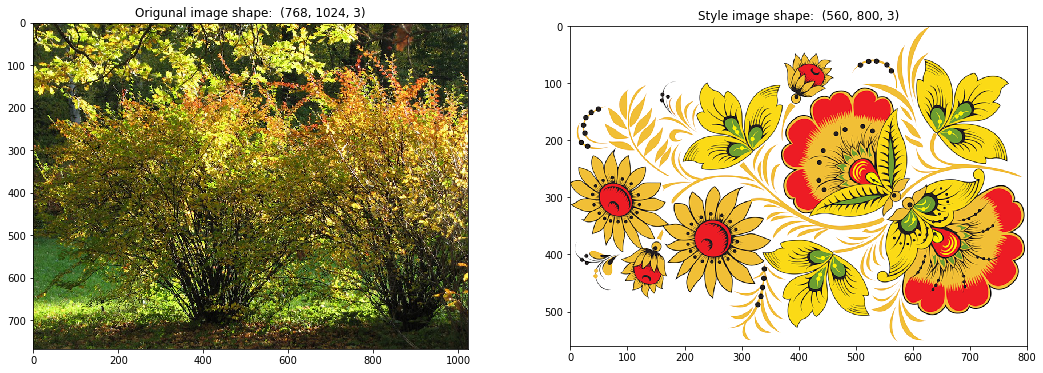

In [53]:
hide_code
display_images('02.png', '04.png')

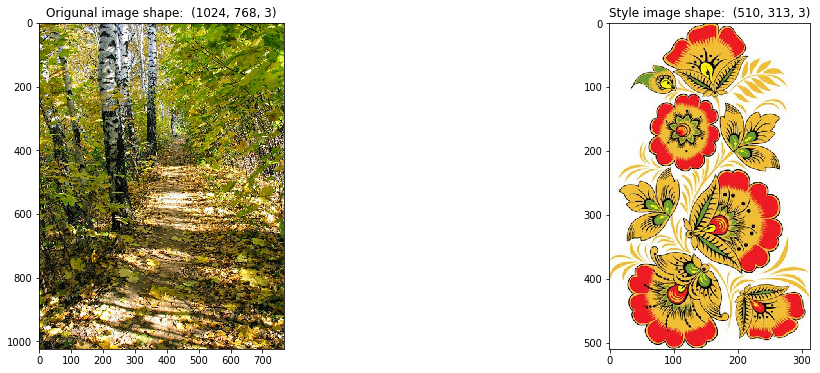

In [57]:
hide_code
display_images('03.png', '06.png')

## Preprocess

In [8]:
hide_code
# Create image tensors and resize the biggest one; Pair 1
img02 = cv2.imread("images/" + "02.png").astype('float32')
img04 = cv2.imread("images/" + "04.png").astype('float32')
img02 = scipy.misc.imresize(img02, img04.shape[:2]).astype('float32')
img02.shape, img04.shape

((560, 800, 3), (560, 800, 3))

In [58]:
hide_code
# Create image tensors and resize the biggest one; Pair 2
img03 = cv2.imread("images/" + "03.png").astype('float32')
img06 = cv2.imread("images/" + "06.png").astype('float32')
img03 = scipy.misc.imresize(img03, img06.shape[:2]).astype('float32')
img03.shape, img06.shape

((510, 313, 3), (510, 313, 3))

In [9]:
hide_code
# Preprocess function for VGG16
def preprocess(img):
    img = img.copy()                   
    img = np.expand_dims(img, axis=0) 
    return keras.applications.vgg16.preprocess_input(img)

In [10]:
hide_code
# Function for input tensors
def inputs(original_img, style_img):
    original_input   = tf.constant(preprocess(original_img))
    style_input     = tf.constant(preprocess(style_img))
    generated_input = tf.placeholder(tf.float32, original_input.shape)
    return original_input, style_input, generated_input

In [11]:
hide_code
# Create input tensors; Pair 1
original_input, style_input, generated_input = inputs(img02, img04)
input_tensor = tf.concat([original_input, style_input, generated_input], axis=0)
input_tensor.shape

TensorShape([Dimension(3), Dimension(560), Dimension(800), Dimension(3)])

In [59]:
hide_code
# Create input tensors; Pair 2
original_input2, style_input2, generated_input2 = inputs(img03, img06)
input_tensor2 = tf.concat([original_input2, style_input2, generated_input2], axis=0)
input_tensor2.shape

TensorShape([Dimension(3), Dimension(510), Dimension(313), Dimension(3)])

## VGG16 Usage

In [12]:
hide_code
# Create the model using keras applications; Pair 1
vgg16_model = keras.applications.vgg16.VGG16(input_tensor=input_tensor, include_top=False)
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (3, 560, 800, 3)          0         
_________________________________________________________________
block1_conv1 (Conv2D)        (3, 560, 800, 64)         1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (3, 560, 800, 64)         36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (3, 280, 400, 64)         0         
_________________________________________________________________
block2_conv1 (Conv2D)        (3, 280, 400, 128)        73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (3, 280, 400, 128)        147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (3, 140, 200, 128)        0         
__________

In [60]:
# Create the model using keras applications; Pair 2
vgg16_model2 = keras.applications.vgg16.VGG16(input_tensor=input_tensor2, include_top=False)
vgg16_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (3, 510, 313, 3)          0         
_________________________________________________________________
block1_conv1 (Conv2D)        (3, 510, 313, 64)         1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (3, 510, 313, 64)         36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (3, 255, 156, 64)         0         
_________________________________________________________________
block2_conv1 (Conv2D)        (3, 255, 156, 128)        73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (3, 255, 156, 128)        147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (3, 127, 78, 128)         0         
__________

In [61]:
hide_code
# Create layer dictionaries
vgg16_layer_dict = {layer.name:layer for layer in vgg16_model.layers}
vgg16_layer_dict2 = {layer.name:layer for layer in vgg16_model2.layers}

In [42]:
hide_code
# Functions for loss calculation
def calculate_original_loss(layer_dict, original_layer_names):
    loss = 0
    for name in original_layer_names:
        layer = layer_dict[name]
        original_features = layer.output[0, :, :, :]  
        generated_features = layer.output[2, :, :, :] 
        loss += keras.backend.sum(keras.backend.square(generated_features - original_features))
    return loss / len(original_layer_names)

def gram_matrix(x):    
    features = keras.backend.batch_flatten(keras.backend.permute_dimensions(x, (2, 0, 1))) 
    gram = keras.backend.dot(features, keras.backend.transpose(features))
    return gram

def get_style_loss(style_features, generated_features):
    S = gram_matrix(style_features)
    G = gram_matrix(generated_features)
    channels = 3
    size = img04.shape[0]*img04.shape[1]
    return keras.backend.sum(keras.backend.square(S - G)) / (4. * (channels**2) * (size**2))

def calculate_style_loss(layer_dict, style_layer_names):
    loss = 0
    for name in style_layer_names:
        layer = layer_dict[name]
        style_features     = layer.output[1, :, :, :] # style features
        generated_features = layer.output[2, :, :, :] # generated features
        loss += get_style_loss(style_features, generated_features) 
    return loss / len(style_layer_names)

def calculate_variation_loss(x):
    row_diff = keras.backend.square(x[:, :-1, :-1, :] - x[:, 1:,    :-1, :])
    col_diff = keras.backend.square(x[:, :-1, :-1, :] - x[:,  :-1, 1:,   :])
    return keras.backend.sum(keras.backend.pow(row_diff + col_diff, 1.25))

In [43]:
hide_code
# Calculate all losses; Pair 1
original_loss = calculate_original_loss(vgg16_layer_dict, ['block5_conv2'])

style_layers = ['block1_conv1','block2_conv1','block3_conv1','block4_conv1', 'block5_conv1']
style_loss = calculate_style_loss(vgg16_layer_dict, style_layers)

variation_loss = calculate_variation_loss(generated_input)

In [62]:
hide_code
# Calculate all losses
original_loss2 = calculate_original_loss(vgg16_layer_dict2, ['block5_conv2'])

style_layers = ['block1_conv1','block2_conv1','block3_conv1','block4_conv1', 'block5_conv1']
style_loss2 = calculate_style_loss(vgg16_layer_dict2, style_layers)

variation_loss2 = calculate_variation_loss(generated_input2)

In [44]:
hide_code
### Pair 1 ###
# Loss and gradients calculation
loss = 0.7 * original_loss + 1.0 * style_loss + 0.2 * variation_loss
        
gradients = keras.backend.gradients(loss, generated_input)[0]
calculate = keras.backend.function([generated_input], [loss, gradients])

# Preprocess the image
generated_data = preprocess(img02)
 
# Generate the new image 
for i in tqdm(range(10)):
    _, gradients_value = calculate([generated_data])
    generated_data -= gradients_value * 0.001

100%|██████████| 10/10 [1:56:40<00:00, 791.19s/it]


In [ ]:
hide_code
# Pair 2
# Loss and gradients calculation
loss2 = 0.8 * original_loss2 + 1.0 * style_loss2 + 0.1 * variation_loss2
        
gradients2 = keras.backend.gradients(loss2, generated_input2)[0]
calculate2 = keras.backend.function([generated_input2], [loss2, gradients2])

# Preprocess the image
generated_data2 = preprocess(img03)
 
# Generate the new image 
for i in tqdm(range(10)):
    _, gradients_value2 = calculate([generated_data2])
    generated_data2 -= gradients_value2 * 0.001

##  Display Style Transfer

In [45]:
hide_code
# Save the result; Pair 1
np.save('generated_data_02.npy', generated_data)

In [ ]:
hide_code
# Save the result; Pair 2
np.save('generated_data2_01.npy', generated_data2)

In [48]:
# Load the result; Pair 1
generated_data_01 = np.load('generated_data_01.npy')
generated_data_02 = np.load('generated_data_02.npy')

In [ ]:
# Load the result; Pair 2
generated_data2_01 = np.load('generated_data2_01.npy')
generated_data2_02 = np.load('generated_data2_02.npy')

In [49]:
hide_code
# Reverse of preprocessing
def deprocess(img):
    img = img.copy()                   
    img = img[0]                        
    img[:, :, 0] += 103.939           
    img[:, :, 1] += 116.779             
    img[:, :, 2] += 123.68             
    img = img[:, :, ::-1]              
    img = np.clip(img, 0, 255)         
    return img.astype('uint8')  

#### Pair 1

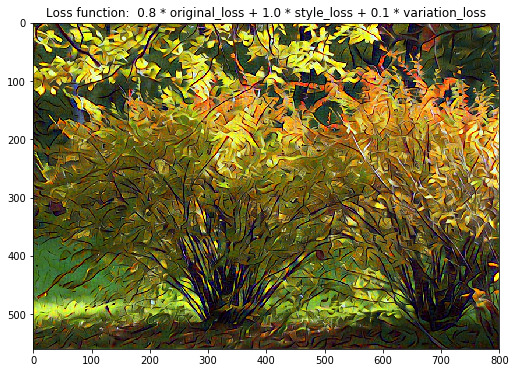

In [50]:
hide_code
# Display the generated image
generated_image01 = deprocess(generated_data_01)
plt.figure(figsize=(12,6))
plt.title("Loss function:  0.8 * original_loss + 1.0 * style_loss + 0.1 * variation_loss")
plt.imshow(cv2.cvtColor(generated_image01, cv2.COLOR_BGR2RGB));

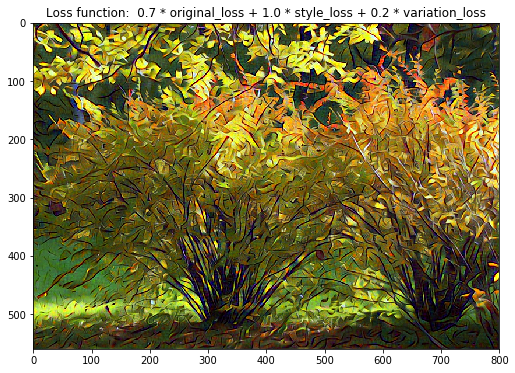

In [51]:
hide_code
# Display the generated image
generated_image02 = deprocess(generated_data_02)
plt.figure(figsize=(12,6))
plt.title("Loss function:  0.7 * original_loss + 1.0 * style_loss + 0.2 * variation_loss")
plt.imshow(cv2.cvtColor(generated_image02, cv2.COLOR_BGR2RGB));

#### Pair 2